In [1]:
from pinotdb import connect

In [2]:
conn = connect(host='localhost', port=9000, path='/sql', scheme='http')

In [3]:
curs = conn.cursor()

In [12]:
import pandas as pd

curs.execute("""
select author, title, count(*) changes from wiki
where published_mil > now() - 1*60*1000
group by author, title
order by changes desc
limit 10
""")

df = pd.DataFrame(curs,
                 columns=[item[0] for item in curs.description])
df

,author,title,changes
0,MIDI,Category:Redirects from moves,2
1,Mastashat,A H. Mohammed,1
2,2601:145:481:1810:5CA2:61FF:8965:40B0,Reba (TV series),1
3,DeltaQuadBot,Wikipedia:Usernames for administrator attentio...,1
4,Dahn,Marta Rădulescu,1
5,EarwigBot,Template:AfC statistics/misplaced,1
6,Plantdrew,Category:Low-importance Algae articles,1
7,LeftAlberta1968,Higgins (dog),1
8,Buckshot06,RAF Lydda,1
9,Esculenta,Teloschistaceae,1


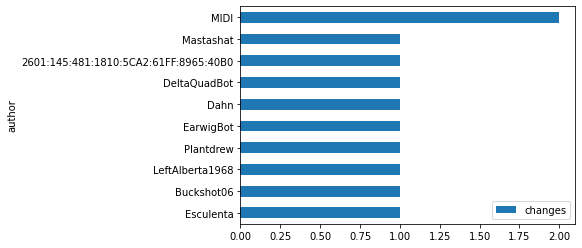

In [13]:
hist = df.plot.barh("author", "changes")
hist.invert_yaxis()


In the cell below, you'll see an example of how to dynamically update a chart.

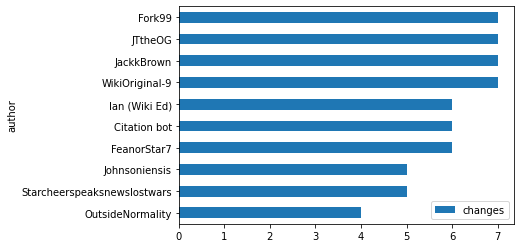

In [15]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def data():
    curs.execute("""
    select author, count(*) changes from wiki
    where published_mil > now() - 1*60*1000
    group by author
    order by changes desc
    limit 10
    """)

    return pd.DataFrame(curs, columns=[item[0] for item in curs.description])


def build():
    hist = data().plot.barh("author", "changes")
    hist.invert_yaxis()
    
    display(hist)
    
    clear_output(wait = True)
    plt.pause(0.5)
    


import threading

build()
threading.Timer(5, build).start()
